In [1]:
import sys
sys.path.insert(0,"../")
import time

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

from src.optimizers.neioptimizer import *
from src.utils.config import CONFIG
CONFIG

{'distribute': {'computer_list': ['tst008@acet116-lnx-10.bucknell.edu',
   'tst008@acet116-lnx-11.bucknell.edu',
   'tst008@acet116-lnx-12.bucknell.edu'],
  'max_jobs': 1,
  'min_gpu': 500},
 'optimizer': {'num_restarts': 10,
  'raw_samples': 500,
  'options': {'batch_limit': 5, 'max_iter': 200, 'seed': 0}}}

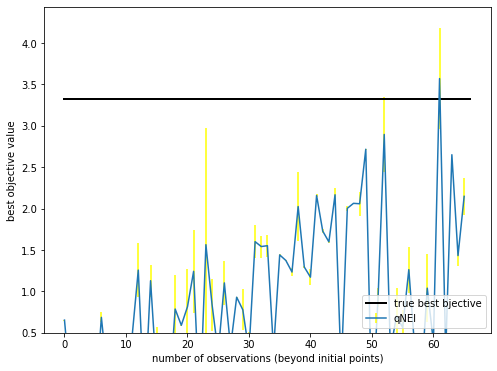

In [230]:
from botorch.test_functions.synthetic import Hartmann

def visualize():
    file_name = "../hartmann.json"
    # Load the data
    train_obj_nei, train_yvar_nei = [], []
    with open(file_name, "r") as f:
        for line in f.readlines():
            observation = json.loads(line)
            train_obj_nei.append(observation["result"][0])
            train_yvar_nei.append(observation["result"][1])

    neg_hartmann6 = Hartmann(negate=True)
    GLOBAL_MAXIMUM = neg_hartmann6.optimal_value
#     GLOBAL_MAXIMUM = 1

    iters = np.arange(max(len(train_obj_nei), len(train_obj_nei)))
    y_nei = np.array(train_obj_nei)
    y_err = np.array(train_yvar_nei)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.errorbar(iters, y_nei, yerr=y_err, label="qNEI", linewidth=1.5, ecolor=['yellow'])
    plt.plot([0, iters.shape[0]], [GLOBAL_MAXIMUM] * 2, 'k', label="true best bjective", linewidth=2)
    ax.set_ylim(bottom=0.5)
    ax.set(xlabel='number of observations (beyond initial points)', ylabel='best objective value')
    ax.legend(loc="lower right")
    plt.show()

count = 199
while count < 200:
    visualize()
    clear_output(wait=True)
    time.sleep(2)
    count += 1

In [3]:
import os
os.getcwd()

'/home/tung/summer/notebooks'

In [ ]:
datetime.datetime.now().strftime("%m/%d/%Y-%H:%M:%S")

In [30]:
from torch import nn

# Input: (N, Channels, Height, Width)
input_conv1 = torch.rand(2, 1, 45, 67)
conv1 = nn.Conv2d(1, 32, 3, 1)

def output_shape(layer):
#layer.in_channels, layer.out_channels, layer.kernel_size, layer.stride, layer.padding, layer.dilation
    if layer
    h = int( (45 + 2*layer.padding[0] - layer.dilation[0] * (layer.kernel_size[0]-1) - 1) / layer.stride[0] + 1 )
    w = int( (67 + 2*layer.padding[1] - layer.dilation[1] * (layer.kernel_size[0]-1) - 1) / layer.stride[1] + 1 )
    h, w

(43, 65)

In [66]:
def get_output_shape(model, image_dim):
    return model(torch.rand(*(image_dim))).data.shape

np.prod(list(get_output_shape(conv1, (2,1,45,67))))

178880

In [31]:
conv1(input_conv1).shape

torch.Size([2, 32, 43, 65])

In [83]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.expected_input_shape = (1, 1, 192, 168)
        self.conv1 = nn.Conv2d(1, 32, 3, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.maxpool1 = nn.MaxPool2d(2)
        self.maxpool2 = nn.MaxPool2d(3)

        # Calculate the input of the Linear layer
        conv1_out = get_output_shape(self.maxpool1, get_output_shape(conv1, self.expected_input_shape))
        conv2_out = get_output_shape(self.maxpool2, get_output_shape(conv2, conv1_out)) 
        fc1_in = np.prod(list(conv2_out)) # Flatten
        
        self.fc1 = nn.Linear(fc1_in, 38)

    def forward(self, x):
        x = self.conv1(x) 
        x = F.relu(x)
        x = self.maxpool1(x) 
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool2(x) 
        x = self.dropout1(x) 
        x = torch.flatten(x, 1) # flatten the 64x31x27 to a single dimension (53568) 
        x = self.fc1(x) 
        output = F.log_softmax(x, dim=1) 
        return output

model = Net() 

x = torch.rand((1, 1, 192, 168))
model(x).shape # outputs

torch.Size([1, 32, 95, 83])
torch.Size([1, 64, 31, 27])
53568


torch.Size([1, 38])

In [235]:
import torch
s = torch.zeros((3,4,5))
s.view(-1,1)[5] = torch.tensor(2.3)
s

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [2.3000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])

In [103]:
o = lambda x: x
t = lambda x: True if o is None else o(x)
t(3)

3

In [105]:
-float("inf")

-inf

In [188]:
import torch
indices = torch.tensor([[[ 0,  1,  2,  5,  6,  7, 12, 17, 18, 22, 23, 21]],

        [[ 2,  3,  4,  7,  8,  9, 15, 16, 20, 21, 22, 13]],

        [[ 0,  1,  5,  6, 10, 11, 15, 16, 17, 20, 21, 12]],

        [[ 1, 10, 15, 16, 17, 18, 20, 21, 22, 23, 24,  2]],

        [[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13]],

        [[ 3,  4,  8,  9, 13, 14, 18, 19, 22, 23, 24, 17]]], device='cuda:0')

scores = torch.rand(6, device="cuda:0")
scores

tensor([0.4543, 0.1785, 0.5205, 0.2440, 0.0864, 0.2351], device='cuda:0')

In [186]:
(torch.sum(indices > 0, axis=2) < 12).squeeze(-1)

tensor([ True, False,  True, False,  True, False], device='cuda:0')

In [212]:
ind = torch.rand((3,2,4,1,6))
ind.shape

torch.Size([3, 2, 4, 1, 6])

In [218]:
placeholder = torch.rand(ind.shape[:-2])
for i in range(len(ind.view(-1, 6))):
    print(ind.view(-1,6)[i])
    if torch.sum(ind.view(-1,6)[i] > 0.9) == 0:
        placeholder.view(-1, 1)[i] = torch.tensor(float("-inf"))
    print(placeholder.view(-1, 1)[i])
placeholder

tensor([0.3495, 0.1737, 0.8384, 0.8109, 0.5726, 0.9595])
tensor([0.9577])
tensor([0.1604, 0.2013, 0.3127, 0.0683, 0.4416, 0.3482])
DANG
tensor([-inf])
tensor([0.1714, 0.4025, 0.1941, 0.9269, 0.4372, 0.7523])
tensor([0.1998])
tensor([0.1475, 0.8133, 0.0224, 0.0826, 0.2089, 0.5039])
DANG
tensor([-inf])
tensor([0.2637, 0.2448, 0.1554, 0.8990, 0.0807, 0.1136])
DANG
tensor([-inf])
tensor([0.7967, 0.3779, 0.0518, 0.7169, 0.9052, 0.7343])
tensor([0.8841])
tensor([0.2039, 0.1533, 0.4908, 0.0457, 0.1072, 0.5596])
DANG
tensor([-inf])
tensor([0.3498, 0.3942, 0.9246, 0.7628, 0.8225, 0.1979])
tensor([0.9718])
tensor([0.3577, 0.5714, 0.7508, 0.6362, 0.4797, 0.3086])
DANG
tensor([-inf])
tensor([0.1045, 0.3164, 0.6976, 0.0588, 0.7820, 0.4433])
DANG
tensor([-inf])
tensor([0.2190, 0.4851, 0.6142, 0.3372, 0.1327, 0.7012])
DANG
tensor([-inf])
tensor([0.0438, 0.3805, 0.0116, 0.7193, 0.8108, 0.5668])
DANG
tensor([-inf])
tensor([0.0549, 0.6651, 0.9191, 0.3756, 0.3108, 0.8652])
tensor([0.7444])
tensor([0.7293

tensor([[[0.9577,   -inf, 0.1998,   -inf],
         [  -inf, 0.8841,   -inf, 0.9718]],

        [[  -inf,   -inf,   -inf,   -inf],
         [0.7444,   -inf, 0.0513,   -inf]],

        [[0.1080,   -inf,   -inf, 0.0666],
         [  -inf,   -inf, 0.6238,   -inf]]])

In [221]:
torch.tensor(1, device=indices.device)

tensor(1, device='cuda:0')

In [202]:
for i in ind.view(-1, 6):
    print(i)

tensor([0.9688, 0.6096, 0.4765, 0.9345, 0.9609, 0.9701])
tensor([0.0233, 0.8903, 0.4119, 0.8182, 0.5109, 0.6642])
tensor([0.4986, 0.1500, 0.0288, 0.5553, 0.2019, 0.1318])
tensor([0.6253, 0.4789, 0.2624, 0.8006, 0.9315, 0.9747])
tensor([0.1718, 0.1232, 0.8317, 0.8664, 0.0175, 0.2773])
tensor([0.5739, 0.7172, 0.5466, 0.6607, 0.6573, 0.2769])
tensor([0.8215, 0.5000, 0.4477, 0.6781, 0.1496, 0.1139])
tensor([0.2424, 0.9607, 0.6667, 0.5025, 0.5430, 0.6570])
tensor([0.1814, 0.0968, 0.5560, 0.0215, 0.3427, 0.5442])
tensor([0.7066, 0.8916, 0.2255, 0.4155, 0.7393, 0.8105])
tensor([0.4287, 0.5932, 0.7619, 0.2041, 0.0894, 0.7854])
tensor([0.3466, 0.2088, 0.7514, 0.1785, 0.5843, 0.1368])
tensor([0.3821, 0.1477, 0.3280, 0.7144, 0.9203, 0.6271])
tensor([0.5697, 0.9178, 0.6663, 0.0772, 0.1755, 0.6909])
tensor([0.5904, 0.5970, 0.1248, 0.5204, 0.5305, 0.3173])
tensor([0.1631, 0.5367, 0.9667, 0.9617, 0.7804, 0.2271])
tensor([0.0491, 0.0781, 0.5654, 0.1175, 0.0884, 0.0482])
tensor([0.8997, 0.8893, 0.4088,

In [222]:
def o(x):
    x.view(-1,1)[0] = 0
    
x = torch.rand(2,3,4)
x

tensor([[[0.1541, 0.2987, 0.0843, 0.2972],
         [0.2160, 0.5471, 0.4673, 0.3638],
         [0.6416, 0.4288, 0.1504, 0.6043]],

        [[0.9894, 0.5668, 0.6249, 0.4120],
         [0.8910, 0.9565, 0.8371, 0.8761],
         [0.7338, 0.3169, 0.9871, 0.0507]]])

In [225]:
ind.view(-1, 6)

tensor([[0.3495, 0.1737, 0.8384, 0.8109, 0.5726, 0.9595],
        [0.1604, 0.2013, 0.3127, 0.0683, 0.4416, 0.3482],
        [0.1714, 0.4025, 0.1941, 0.9269, 0.4372, 0.7523],
        [0.1475, 0.8133, 0.0224, 0.0826, 0.2089, 0.5039],
        [0.2637, 0.2448, 0.1554, 0.8990, 0.0807, 0.1136],
        [0.7967, 0.3779, 0.0518, 0.7169, 0.9052, 0.7343],
        [0.2039, 0.1533, 0.4908, 0.0457, 0.1072, 0.5596],
        [0.3498, 0.3942, 0.9246, 0.7628, 0.8225, 0.1979],
        [0.3577, 0.5714, 0.7508, 0.6362, 0.4797, 0.3086],
        [0.1045, 0.3164, 0.6976, 0.0588, 0.7820, 0.4433],
        [0.2190, 0.4851, 0.6142, 0.3372, 0.1327, 0.7012],
        [0.0438, 0.3805, 0.0116, 0.7193, 0.8108, 0.5668],
        [0.0549, 0.6651, 0.9191, 0.3756, 0.3108, 0.8652],
        [0.7293, 0.3068, 0.8630, 0.6434, 0.8180, 0.5119],
        [0.0696, 0.4448, 0.1647, 0.9630, 0.3015, 0.6259],
        [0.4982, 0.2773, 0.1831, 0.7760, 0.8053, 0.1345],
        [0.8417, 0.9019, 0.4342, 0.8222, 0.2506, 0.9777],
        [0.444

In [169]:
scores[] = torch.tensor(float("-inf"), device="cuda:0")

In [184]:
torch.dot(indices[..., -2] > indices[..., -1], scores)

RuntimeError: _th_dot not supported on CUDAType for Bool